In [ ]:
def figsize(scale):
    fig_width_pt = 345.0                            # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

In [1]:
import pickle
import numpy as np
from operator import add
from operator import sub
import matplotlib as mpl
mpl.use('pgf')
mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['pgf.preamble'] = [r"\newcommand{\svm}{xxxxxxxxxx}",r"\newcommand{\svmb}{xxxxxxxxxx}",r"\newcommand{\lstmng}{xxxxxxxxxx}",r"\newcommand{\lstmc}{xxxxxxxxxx}",r"\newcommand{\lstmb}{xxxxxxxxxx}",r"\newcommand{\site}{xxxxxxxxxx}",r"\newcommand{\fullSite}{xxxxxxxxxx}",r"\newcommand{\type}{xxxxxxxxxx}",r"\newcommand{\behaviour}{xxxxxxxxxx}"]
#mpl.rcParams['figure.figsize'] = figsize(0.9)
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
outputPlotDir = "plots/avg"

models = ['SVM', 'SVMb', 'LSTMng', 'LSTMcv', 'LSTMb']
#models = ['SVM', 'LSTMng', 'LSTMb']
#models = ['SVM', 'SVMb']

tasks = ['sede1', 'sede12', 'morfo1', 'morfo2']
curves = ['roc-curve', 'pr-curve']

fileFolderNames = {
    "SVM" : "filesFolds-SVM",
    "SVMb" : "filesFolds-SVMbigrams",
    "LSTMng" : "filesFolds-LSTMnoGloVe", 
    "LSTMcv" : "filesFolds-LSTMconvolutional2",
    "LSTMb" : "filesFolds-LSTMbidirectional5e",
}
titlesTask = {
    'sede1' : r'\site{}',
    'sede12' : r'\fullSite{}', 
    'morfo1' : r'\type{}',
    'morfo2' : r'\behaviour{}',
}
titlesModel = {
    "SVM" : r"\svm{}",
    "SVMb" : r"\svmb{}",
    'LSTMng' : r'\lstmng{}',
    'LSTMcv' : r'\lstmc{}', 
    'LSTMb' : r'\lstmb{}',
}
titlesAverage = {
    'micro' : "micro",
    'macro' : "macro",
}

titlesCurve = {
    'roc-curve' : 'ROC',
    'pr-curve' : 'Rec./prec.'
}
xLabels = {
    'roc-curve' : 'False Positive Rate',
    'pr-curve' : 'Recall',
}
yLabels = {
    'roc-curve' : 'True Positive Rate',
    'pr-curve' : 'Precision',
}

averages = ['micro', 'macro']
colors = {
    'micro' : 'blue',
    'macro' : 'red',
}
colorsSD = {
    'micro' : 'lightblue',
    'macro' : 'salmon',
}
colorsM = {
    "SVM" : 'black',
    "SVMb" : 'brown',
    'LSTMng':'red',
    'LSTMcv':'blue', 
    'LSTMb':'green',
}

legendLoc = {
    #'roc-curve' : "lower right",
    #'pr-curve' : "lower left",
    'roc-curve' : "best",
    'pr-curve' : "best",
}
    

In [3]:
met = {}
cur = {}
for model in models:
    evaluationFile = "./"+fileFolderNames[model]+"/output/evaluationMean.p"
    met[model] = pickle.load(open(evaluationFile, 'rb'))
    curvesFile = "./"+fileFolderNames[model]+"/output/curvesAll.p"
    cur[model] = pickle.load(open(curvesFile, 'rb'))

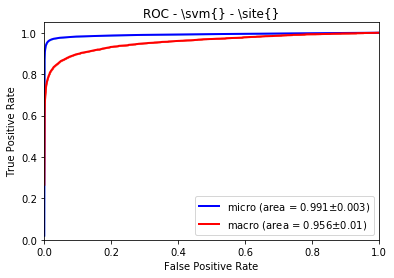

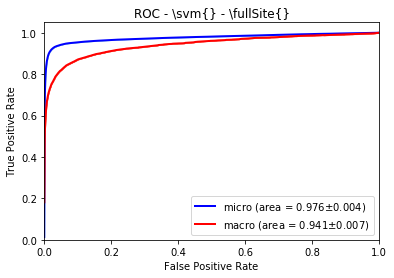

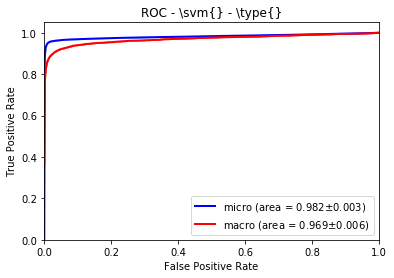

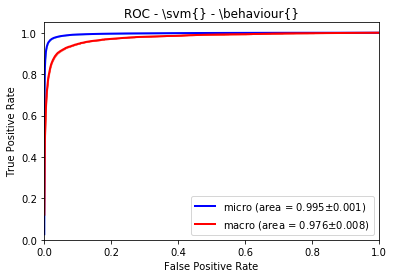

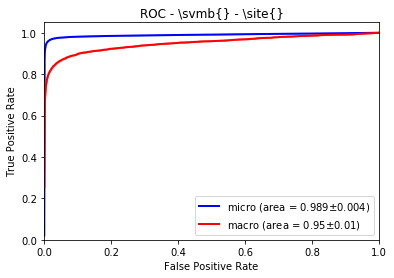

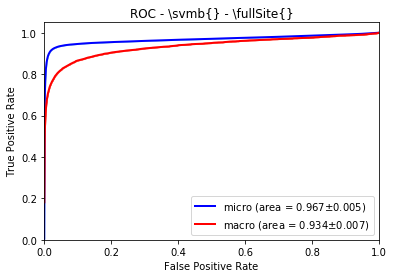

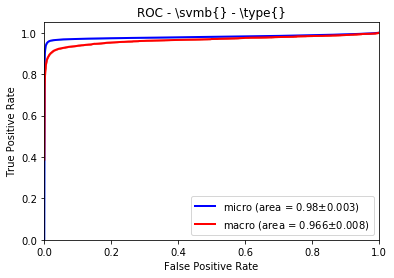

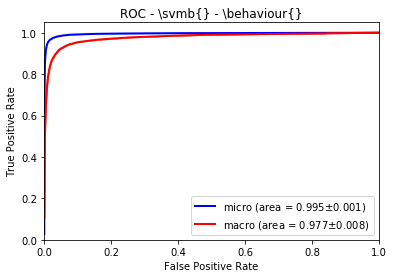

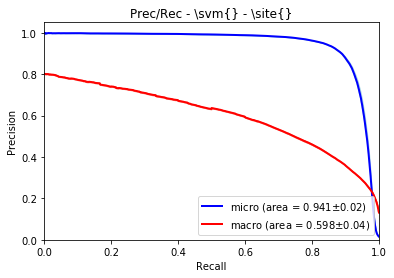

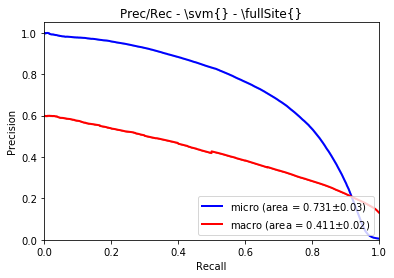

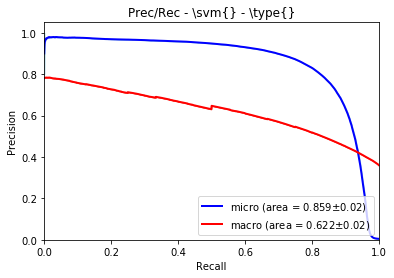

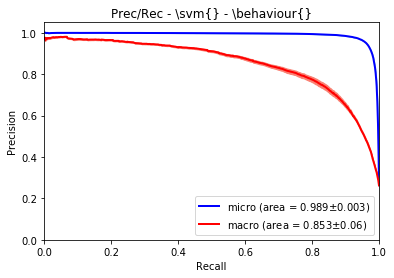

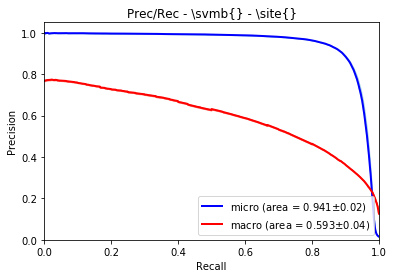

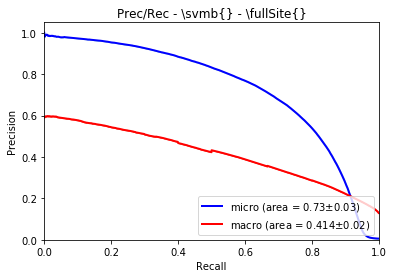

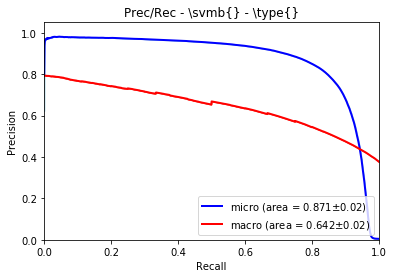

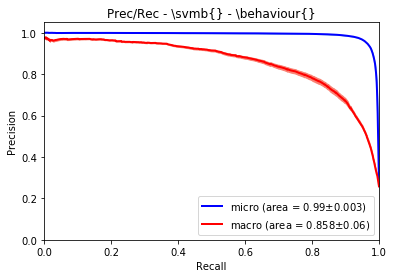

In [9]:
for curve in curves:
    for model in models:
        for task in tasks:
            fig = plt.figure()
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])

            plt.xlabel(xLabels[curve])
            plt.ylabel(yLabels[curve])
            plt.title(titlesCurve[curve]+" - "+titlesModel[model]+" - "+titlesTask[task])
            #plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
            #for c in range(n_classes):
            #    plt.plot(fpr[c], tpr[c], lw=1, label='ROC curve {} (area = {:0.2f})'.format(c, roc_auc[2]))
            for avg in averages:
                if plotMeanSD:
                    plt.fill_between(met[model][task][curve]['x'], list(map(add, met[model][task][curve]['y'][avg]['mean'], met[model][task][curve]['y'][avg]['sd'])), list(map(sub, met[model][task][curve]['y'][avg]['mean'], met[model][task][curve]['y'][avg]['sd'])), color=colorsSD[avg])
                    plt.plot(met[model][task][curve]['x'], met[model][task][curve]['y'][avg]['mean'], color=colors[avg], lw=2, label=avg+" (area = {:.3}$\pm${:.1})".format(met[model][task][curve]['auc'][avg]['mean'], met[model][task][curve]['auc'][avg]['sd']))
            
            plt.legend(loc="lower right")
            plt.savefig(outputPlotDir+"/"+curve+"-"+model+"-"+task+".pgf", bbox_inches='tight')
            plt.show()

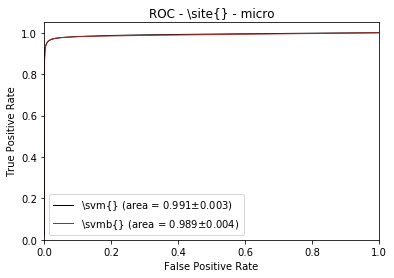

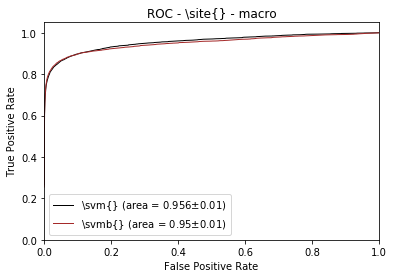

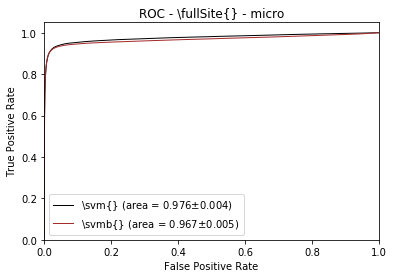

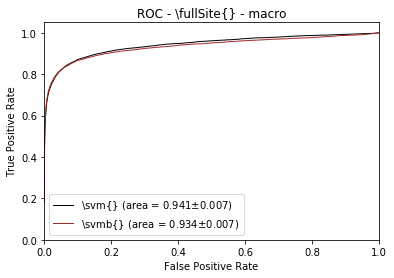

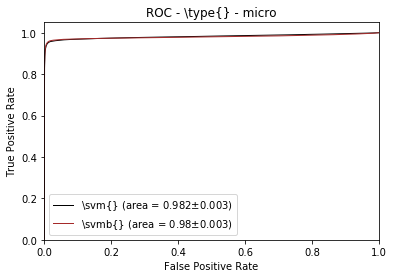

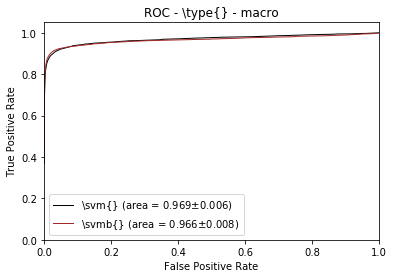

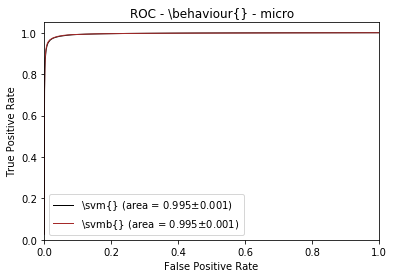

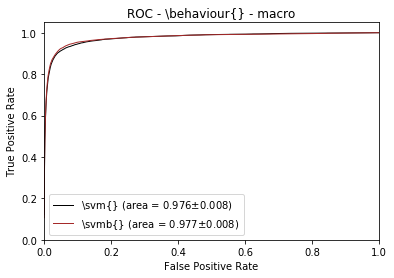

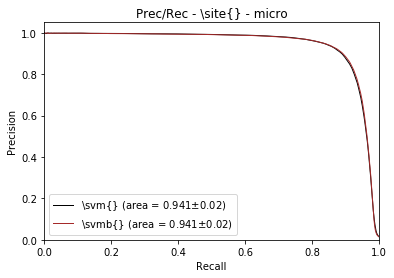

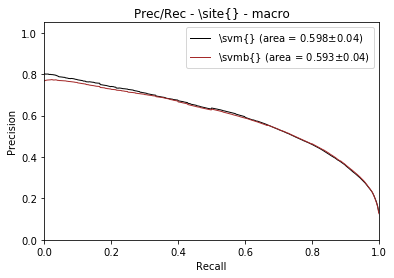

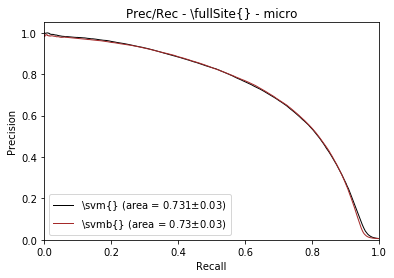

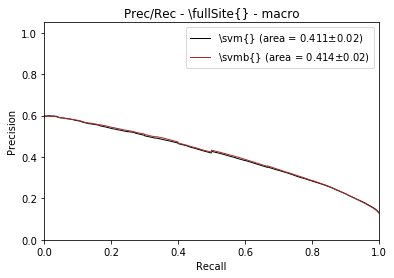

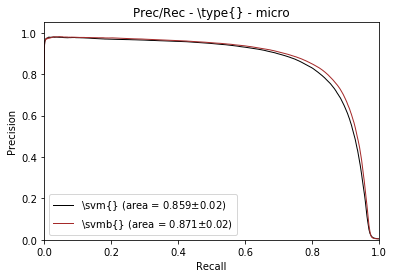

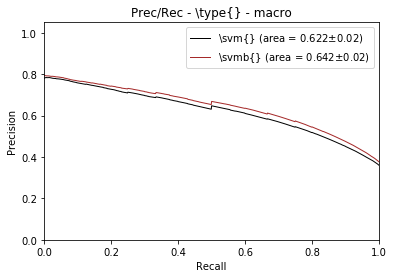

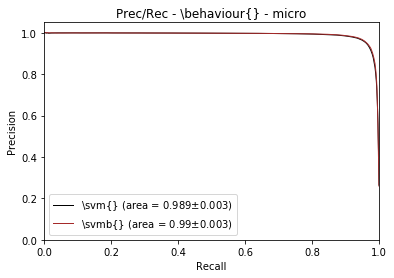

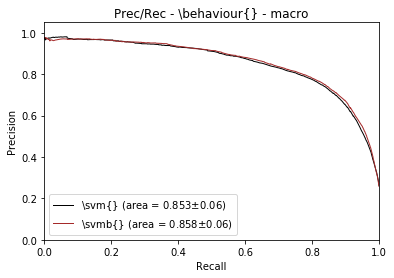

In [12]:
plotMeanSD = True
plotSD = False
lineWidth = 1

for curve in curves:
    for task in tasks:
        for avg in averages:
            fig = plt.figure()
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])

            plt.xlabel(xLabels[curve])
            plt.ylabel(yLabels[curve])
            plt.title(titlesCurve[curve]+" - "+titlesTask[task]+" - "+titlesAverage[avg])

            for model in models:
                if plotMeanSD:
                    if plotSD:
                        plt.fill_between(met[model][task][curve]['x'], list(map(add, met[model][task][curve]['y'][avg]['mean'], met[model][task][curve]['y'][avg]['sd'])), list(map(sub, met[model][task][curve]['y'][avg]['mean'], met[model][task][curve]['y'][avg]['sd'])), color=colorsSD[avg])
                    plt.plot(met[model][task][curve]['x'], met[model][task][curve]['y'][avg]['mean'], color=colorsM[model], lw=lineWidth, label="{} (area = {:.3}$\pm${:.1})".format(titlesModel[model], met[model][task][curve]['auc'][avg]['mean'], met[model][task][curve]['auc'][avg]['sd']))
                else:
                    plt.plot(met[model][task][curve]['xAll'][avg], met[model][task][curve]['yAll'][avg], color=colorsM[model], linestyle='none', marker='.', label="{} (area = {:.3})".format(titlesModel[model], met[model][task][curve]['aucAll'][avg]))

            plt.legend(loc=legendLoc[curve])
            plt.savefig(outputPlotDir+"/"+curve+"-"+task+"-"+avg+".pgf", bbox_inches='tight')
            plt.show()

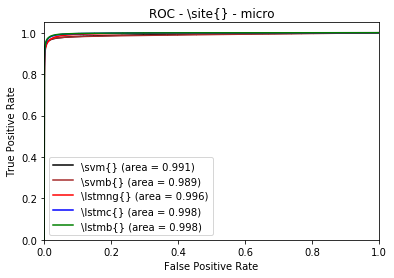

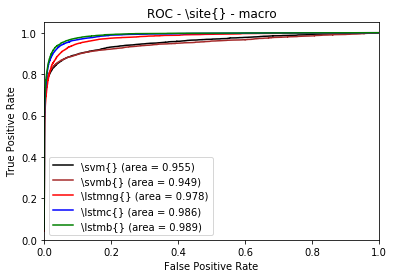

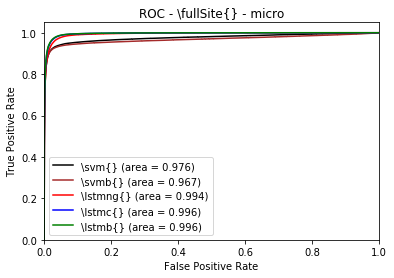

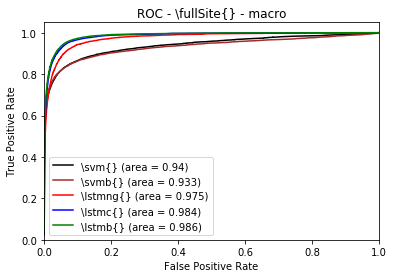

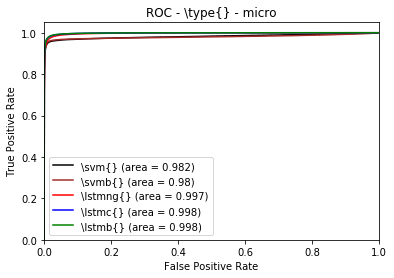

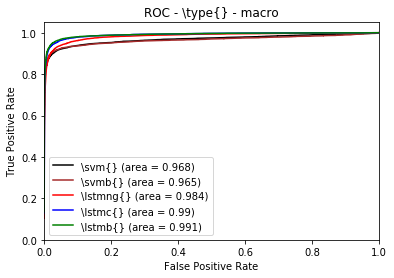

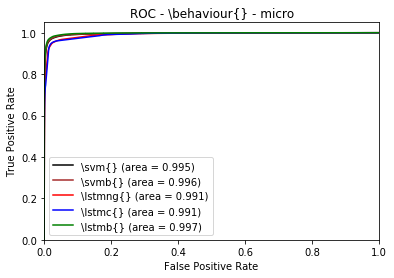

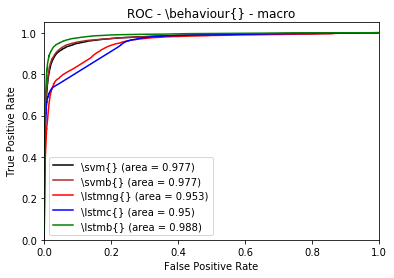

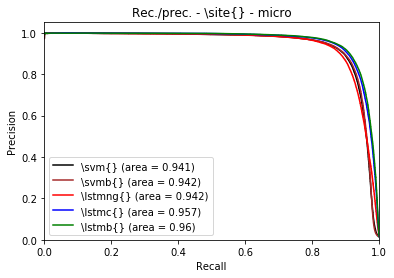

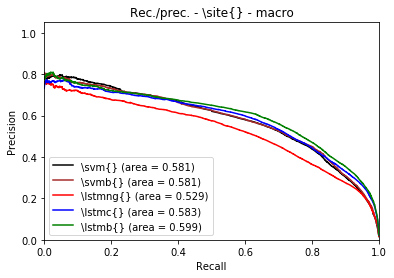

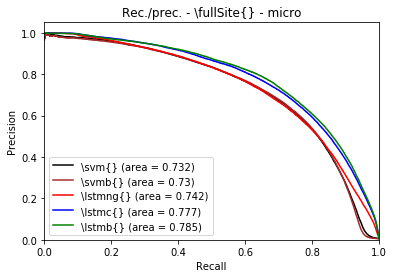

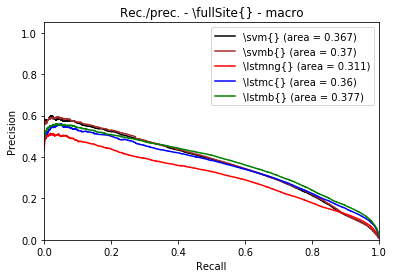

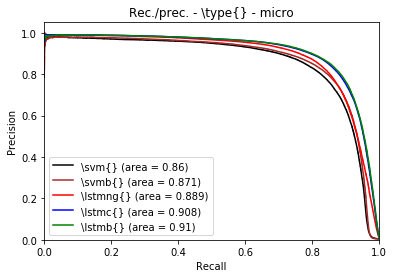

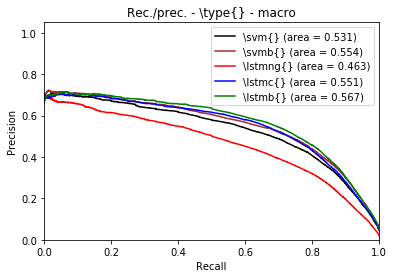

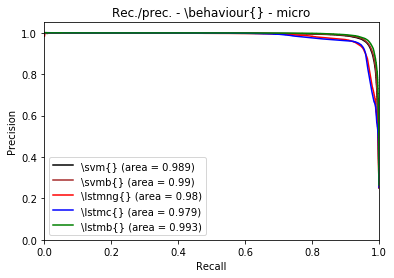

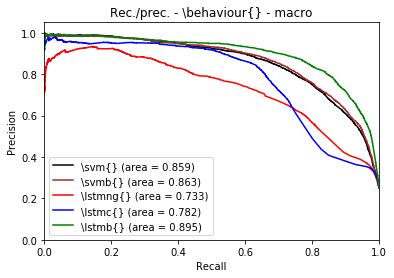

In [7]:
lineWidth = 1

for curve in curves:
    for task in tasks:
        for avg in averages:
            fig = plt.figure()
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])

            plt.xlabel(xLabels[curve])
            plt.ylabel(yLabels[curve])
            plt.title(titlesCurve[curve]+" - "+titlesTask[task]+" - "+titlesAverage[avg])

            for model in models:
                plt.plot(cur[model][task][curve]['x'][avg], cur[model][task][curve]['y'][avg], color=colorsM[model], label="{} (area = {:.3})".format(titlesModel[model], cur[model][task][curve]['auc'][avg]))

            plt.legend(loc=legendLoc[curve])
            plt.savefig(outputPlotDir+"/"+curve+"-"+task+"-"+avg+".pgf", bbox_inches='tight')
            plt.show()